In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib



In [9]:
dataset=pd.read_csv("data.csv")


In [10]:
data=pd.read_csv("data.csv")

In [11]:
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [12]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [13]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors = 'coerce')




In [14]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [15]:
data['timestamp']


0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [16]:
column_1 = data.iloc[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter})


C:\Users\91981\AppData\Local\Temp\ipykernel_3860\1533805666.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,
C:\Users\91981\AppData\Local\Temp\ipykernel_3860\1533805666.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": column_1.dt.weekofyear,


In [17]:
dataset1=dataset.drop('timestamp',axis=1)
data1=pd.concat([db,dataset1],axis=1)

In [18]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2068 non-null   float64
 1   month       2068 non-null   float64
 2   day         2068 non-null   float64
 3   hour        2068 non-null   float64
 4   dayofyear   2068 non-null   float64
 5   week        2068 non-null   float64
 6   weekofyear  2068 non-null   float64
 7   dayofweek   2068 non-null   float64
 8   weekday     2068 non-null   float64
 9   quarter     2068 non-null   float64
 10  act379      2090 non-null   int64  
 11  act13       2090 non-null   int64  
 12  act279      2090 non-null   int64  
 13  act323      2090 non-null   int64  
 14  act363      2090 non-null   int64  
 15  act302      2090 non-null   int64  
 16  latitude    2090 non-null   float64
 17  longitude   2090 non-null   float64
dtypes: float64(12), int64(6)
memory usage: 294.0 KB


In [19]:
data1.dropna(inplace=True)
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


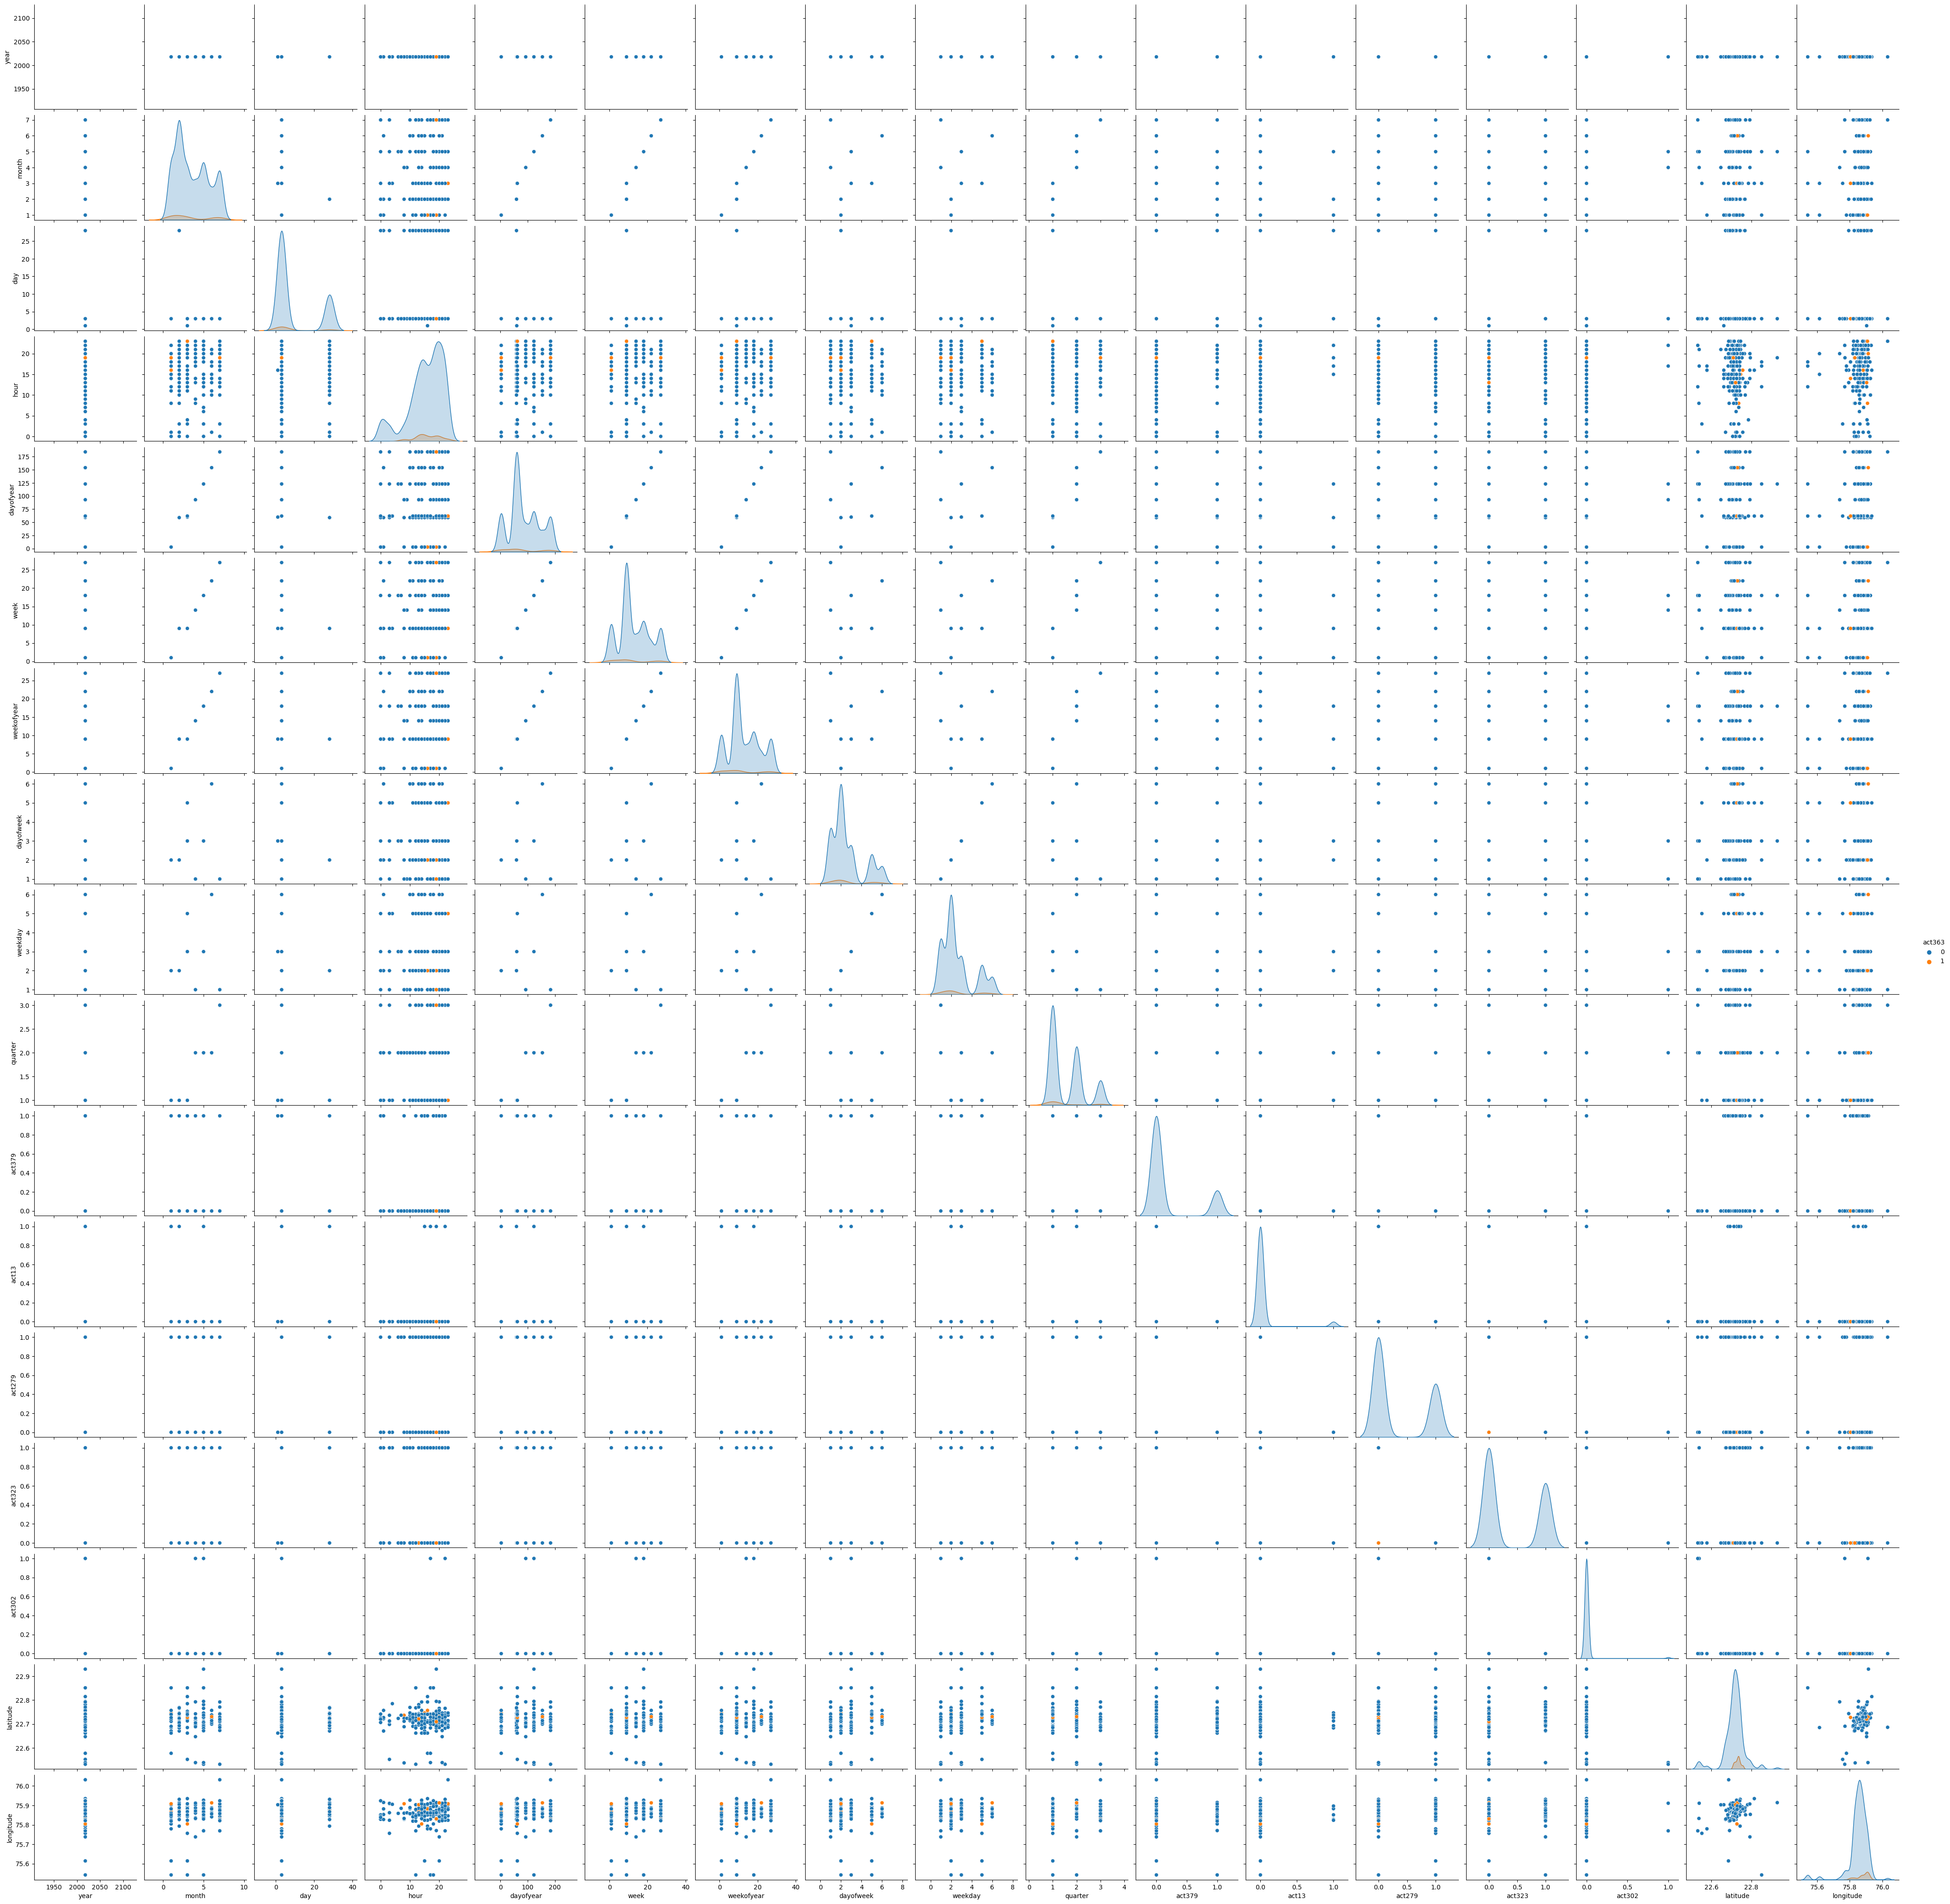

In [20]:
sns.pairplot(data1,hue='act363')


<AxesSubplot:xlabel='act379', ylabel='hour'>

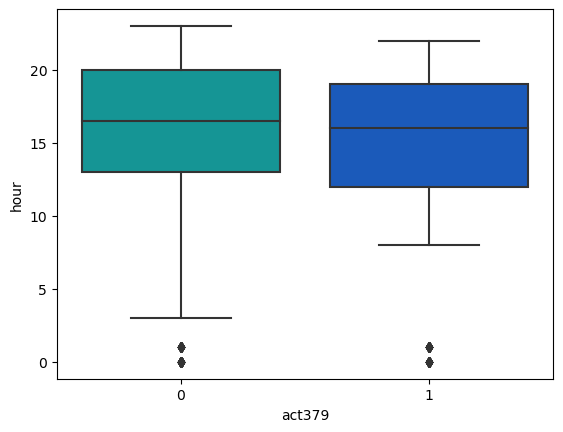

In [21]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')


<AxesSubplot:xlabel='act13', ylabel='hour'>

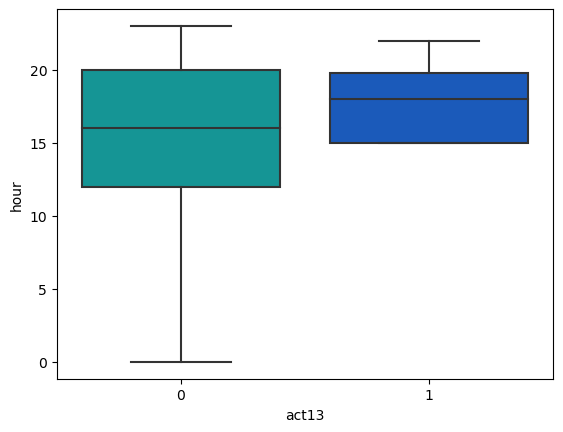

In [22]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

<AxesSubplot:xlabel='act323', ylabel='hour'>

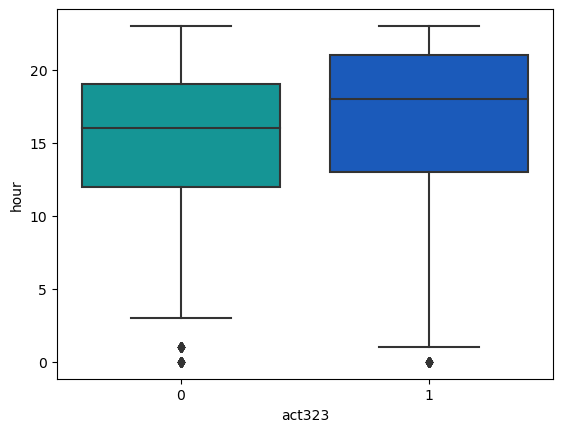

In [23]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

<AxesSubplot:xlabel='act363', ylabel='hour'>

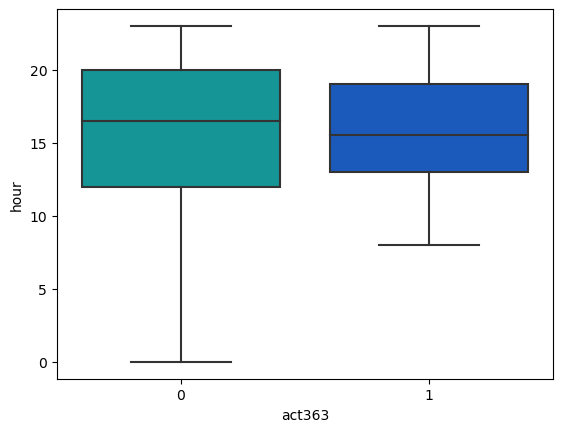

In [24]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

NameError: name 'df' is not defined

<AxesSubplot:xlabel='act13', ylabel='hour'>

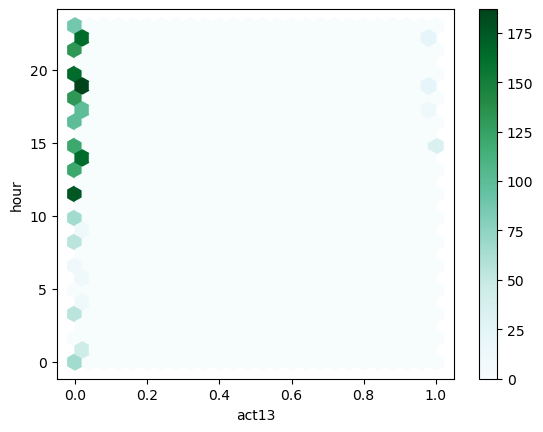

In [26]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])
df.plot.hexbin(x='act13',y='hour',gridsize=25)

<AxesSubplot:ylabel='Density'>

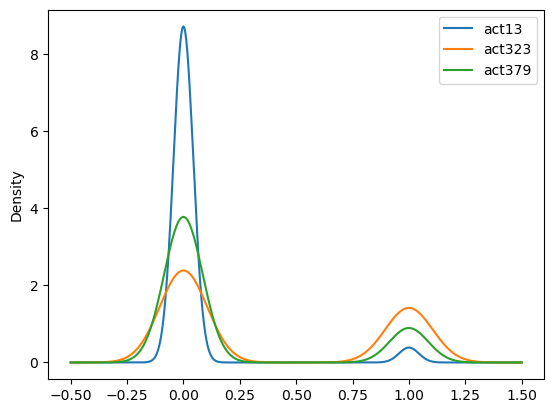

In [27]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])
df1.plot.kde()

<AxesSubplot:xlabel='act302', ylabel='hour'>

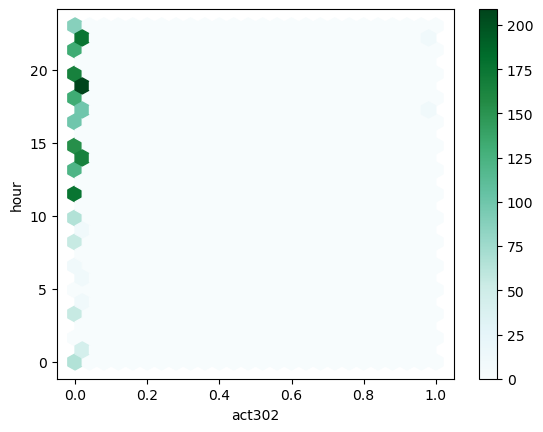

In [31]:
df = pd.DataFrame(data=data1, columns=['act302', 'hour', 'day'])
df.plot.hexbin(x='act302',y='hour',gridsize=25)

<AxesSubplot:xlabel='act379', ylabel='hour'>

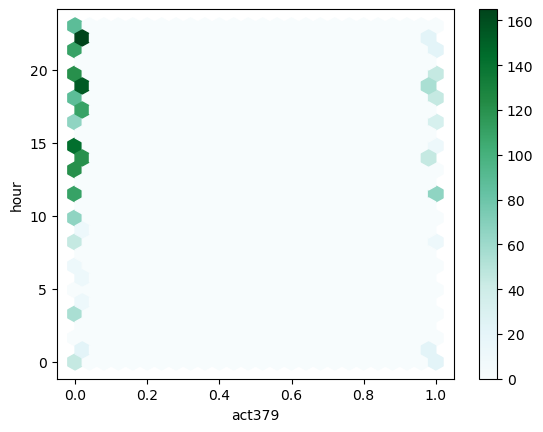

In [32]:
df = pd.DataFrame(data=data1, columns=['act379', 'hour', 'day'])
df.plot.hexbin(x='act379',y='hour',gridsize=25)

<AxesSubplot:>

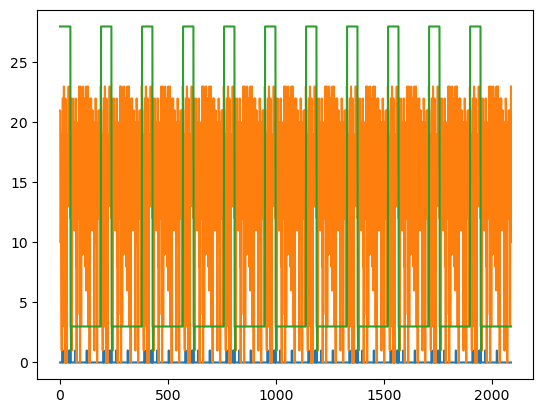

In [28]:
df.plot(legend=False)

<AxesSubplot:xlabel='act302', ylabel='hour'>

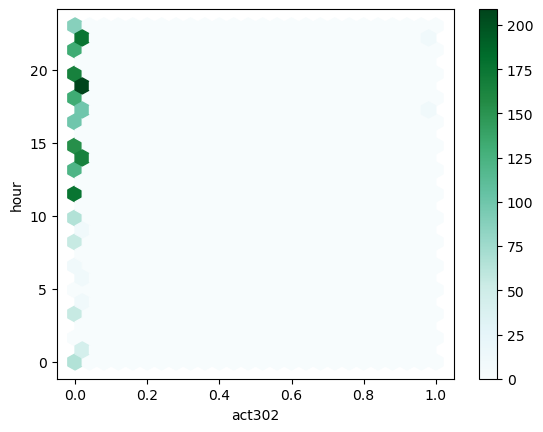

In [34]:
df = pd.DataFrame(data=data1, columns=['act302', 'hour', 'day'])
df.plot.hexbin(x='act302',y='hour',gridsize=25)

In [35]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values

In [36]:
X


array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [37]:
y=data1.iloc[:,[10,11,12,13,14,15]].values

In [38]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split




In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
knn.score(X_test,y_test)

C:\Users\91981\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9396135265700483

In [43]:
knn.score(X_train,y_train)

C:\Users\91981\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9818621523579202

In [44]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\91981\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91981\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

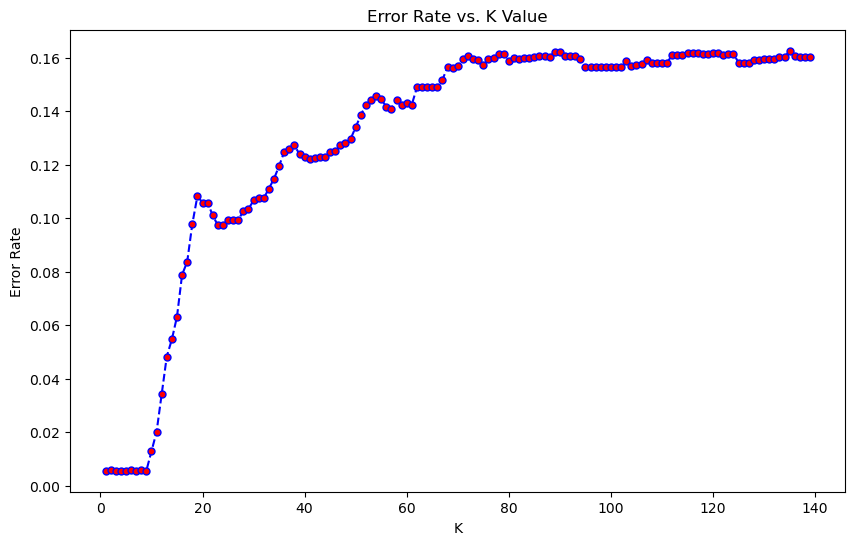

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [48]:
y_pred=dtree.predict(X_test)

In [49]:
dtree.score(X_test,y_test)

0.9806763285024155

In [50]:
dtree.score(X_train,y_train)

0.9915356711003628

In [51]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [52]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)

In [53]:
treefeatures

array([0.00934881, 0.03958678, 0.3138252 , 0.09146966, 0.0174176 ,
       0.26411523, 0.26423671])

In [54]:
features = data1.iloc[:,[1,2,3,4,6,16,17]]

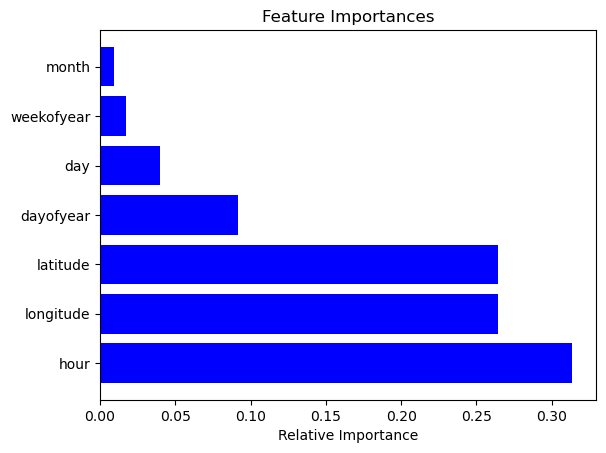

In [55]:
# Get the feature importances and indices, and sort them in decreasing order
treefeatures = dtree.feature_importances_
indices = np.argsort(treefeatures)[::-1]

# Reorder the columns of the features DataFrame to match the order of the feature importances
features = features.iloc[:, indices]

# Plot the feature importances
plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features.columns)
plt.xlabel('Relative Importance')
plt.show()


In [56]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

In [57]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

ModuleNotFoundError: No module named 'pydot'

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
import os

if not os.path.exists('model'):
    os.makedirs('model')

In [60]:
y_pred=rfc.predict(X_test)

In [61]:
rfc.score(X_test,y_test)

0.9806763285024155

In [62]:
rfc.score(X_train,y_train)

0.9915356711003628

In [63]:
joblib.dump(rfc, 'model/rf_model')

['model/rf_model']

In [64]:
import os, sys, shutil, time
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import urllib.request
import json
#from geopy.geocoders import Nominatim
from geopy.geocoders import Nominatim
import geopy


rfc = joblib.load('model/rf_model')
print('model loaded')
geopy.geocoders.options.default_user_agent = "my-app-1.0"
geolocator = Nominatim(user_agent="my-app-1.0")


address = input("Enter the location: ")
location = geolocator.geocode(address,timeout=None)
print(location.address)
lat=[location.latitude]
log=[location.longitude]
latlong=pd.DataFrame({'latitude':lat,'longitude':log})
print(latlong)

DT= input("Enter the timestamp in dd/mm/YYYY HH:MM:SS format: ")
latlong['timestamp']=DT
data=latlong
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

data['timestamp'] = pd.to_datetime(data['timestamp'].astype(str), errors='coerce')
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')
column_1 = data.iloc[:,0]
DT=pd.DataFrame({"year": column_1.dt.year,
          "month": column_1.dt.month,
          "day": column_1.dt.day,
          "hour": column_1.dt.hour,
          "dayofyear": column_1.dt.dayofyear,
          "week": column_1.dt.week,
          "weekofyear": column_1.dt.weekofyear,
          "dayofweek": column_1.dt.dayofweek,
          "weekday": column_1.dt.weekday,
          "quarter": column_1.dt.quarter,
         })
data=data.drop('timestamp',axis=1)
final=pd.concat([DT,data],axis=1)
X=final.iloc[:,[1,2,3,4,6,10,11]].values
my_prediction = rfc.predict(X)
if my_prediction[0][0] == 1:
    my_prediction='Predicted crime : Act 379-Robbery'
elif my_prediction[0][1] == 1:
    my_prediction='Predicted crime : Act 13-Gambling'
elif my_prediction[0][2] == 1:
    my_prediction='Predicted crime : Act 279-Accident'
elif my_prediction[0][3] == 1:
    my_prediction='Predicted crime : Act 323-Violence'
elif my_prediction[0][4] == 1:
    my_prediction='Predicted crime : Act 302-Murder'
elif my_prediction[0][5] == 1:
    my_prediction='Predicted crime : Act 363-kidnapping'
else:
    my_prediction='Place is safe no crime expected at that timestamp.'

print(my_prediction)


model loaded
Enter the location: Rajwada Indore
Rajwada Palace, Sarafa Street, Martand Chowk, Indore, Indore District, Madhya Pradesh, 452001, India
    latitude  longitude
0  22.718434  75.854776
Enter the timestamp in dd/mm/YYYY HH:MM:SS format: 30/05/2023 10:15:00
Predicted crime : Act 323-Violence


C:\Users\91981\AppData\Local\Temp\ipykernel_3860\61377114.py:42: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,
C:\Users\91981\AppData\Local\Temp\ipykernel_3860\61377114.py:43: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": column_1.dt.weekofyear,


In [ ]:
om=rfc.feature_importances_
indices = np.argsort(om)

In [ ]:
om

In [ ]:
features = data1.columns

In [ ]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
!ipython nbconvert --to slides CrimePrediction.ipynb

In [ ]:
!ipython nbconvert --to pdf CrimePrediction.ipynb
